# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



# Desarrollo de las actividades
## 1. Importar el dataset
- Importar las bibliotecas necesarias
- Leer el dataset (`read_csv`) y guardarlo en una variable (`df`) 

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [ ]:
df =pd.read_csv("datasets_calificaciones.csv")

# 2. Exploración incial de los datos

- Leer los primeros valores (`.head()`)
- Ver los valores nulos y los tipos de datos de las columnas (`.info()`)
- Ver la cantidad de valores nulos con (`.isnull().sum()`)
- Obtener las primeras estadísticas descriptivas con (`df.describe()`)

In [3]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [31]:
df.isnull().sum()

Estudiante     0
Materia        0
Parcial 1     12
Parcial 2     12
Final         15
Asistencia     0
dtype: int64

In [9]:
df.describe()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
count,100,100,95,90,89,100
unique,96,7,49,45,46,35
top,mateo díaz,matematicas,,7.5,9.5,99%
freq,2,25,7,5,4,5


# 3. Limpieza y normalización de los datos

- Para que todos los nombres de las columnas esén en el mismo formato, se usa el método `rename` de pandas.
- Para los nombres y apellidos de la columna "Estudiante", se normaliza escribiendo la primer letra en mayúscula.
- Para los nombres de las materias, se normaliza escribiendo la primer letra en mayúscula y quitando los espacios en blanco, con `.str.title().str.strip()`.
- A los valores de "Parcial 1", "Parcial 2" y "Final" lo convertimos en numéricos usando `pd.to_numeric()`
- Se reemplazan los valores nulos usando la mediana y usando el método `fillna()`
- Se elimina el simbolo "%" de la columna "Asistencia" y se convierte el tipo. 


In [4]:
df.rename(columns={"estudiante": "Estudiante"}, inplace=True)

df.head(2)

,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%


In [5]:
df["Estudiante"] = df["Estudiante"].str.title().str.strip()
df["Materia"] = df["Materia"].str.title().str.strip()


df.head(4)

,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8,7.5,9,95%
1,Carlos López,Fisica,6.2,7,NaN,88%
2,María Gómez,Quimica,9,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6,7,75


In [7]:
df["Parcial 1"] = pd.to_numeric(df["Parcial 1"], errors="coerce")
df["Parcial 2"] = pd.to_numeric(df["Parcial 2"], errors="coerce")
df["Final"] = pd.to_numeric(df["Final"], errors="coerce")

print(df.dtypes)
df.isnull().sum()


Estudiante     object
Materia        object
Parcial 1     float64
Parcial 2     float64
Final         float64
Asistencia     object
dtype: object


Estudiante     0
Materia        0
Parcial 1     12
Parcial 2     12
Final         15
Asistencia     0
dtype: int64

In [8]:

df["Parcial 1"] = df["Parcial 1"].fillna(df["Parcial 1"].median())
df["Parcial 2"] = df["Parcial 2"].fillna(df["Parcial 2"].median())
df["Final"] = df["Final"].fillna(df["Final"].median())

df.head(10)



,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95%
1,Carlos López,Fisica,6.2,7.0,7.8,88%
2,María Gómez,Quimica,9.0,8.8,9.5,100%
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92%
5,Javier Soto,Fisica,5.8,6.5,6.0,80%
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,7.8,98%
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85%
8,Valentina Ruiz,Matematicas,7.0,7.7,7.8,90%
9,Diego Castro,Fisica,6.8,7.2,7.5,93%


In [14]:
df["Asistencia"] = df["Asistencia"].replace("%", "", regex=True)

df["Asistencia"] = pd.to_numeric(df["Asistencia"], errors="coerce")

print(df.dtypes)

df.head()


Estudiante     object
Materia        object
Parcial 1     float64
Parcial 2     float64
Final         float64
Asistencia      int64
dtype: object


,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,7.8,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92


# 4. Obtención de Estadísticas Descriptivas

- Se vuelven a calcular después de la limpieza con `.describe()`
- Estadísticas por grupo con `.groupby()`
- Calculamos varias estadísticas a la vez por grupo con `.agg()`


In [15]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,100.000000,100.000000,100.000000,100.00000
mean,7.840000,7.815000,7.880000,88.27000
std,1.134402,1.109771,1.111646,8.58217
min,5.500000,5.800000,5.700000,70.00000
25%,7.075000,6.975000,7.100000,81.75000
50%,7.900000,7.700000,7.800000,88.50000
75%,8.800000,8.800000,8.825000,96.00000
max,9.900000,9.900000,9.900000,103.00000


In [27]:
df.groupby("Materia")[["Parcial 1", "Parcial 2", "Final"]].mean()


,Parcial 1,Parcial 2,Final
Materia,,,
Ciencias Sociales,9.500000,9.100000,7.800000
Fisica,6.587500,6.833333,6.620833
Historia,7.375000,7.020833,7.466667
Literatura Universal,8.000000,7.800000,8.200000
Matematicas,8.104000,8.220000,8.456000
Programacion Basica,7.900000,5.900000,6.300000
Quimica,9.204167,9.195833,9.008333


In [29]:
df.groupby("Materia")["Final"].agg(["mean", "median", "std", "count"])

,mean,median,std,count
Materia,,,,
Ciencias Sociales,7.800000,7.80,NaN,1
Fisica,6.620833,6.50,0.674362,24
Historia,7.466667,7.45,0.535413,24
Literatura Universal,8.200000,8.20,NaN,1
Matematicas,8.456000,8.50,0.655159,25
Programacion Basica,6.300000,6.30,NaN,1
Quimica,9.008333,9.15,0.703356,24


# 5. Visualización de los Datos con Matplotlib

- Se generan un histograma para visualizar la distribución de las calificaciones del Final 
- Gráfico para visualizar y comparar la distribucion de todas las notas
- Diagrama de Dispersión para ver relación entre Parcial 1 y Parcial 2
- Gráfico de barras por grupo para mostrar cómo varían las notas según la matería 
- Gráfico de barras horizontales para mostrar el promedio de asistencia por materia

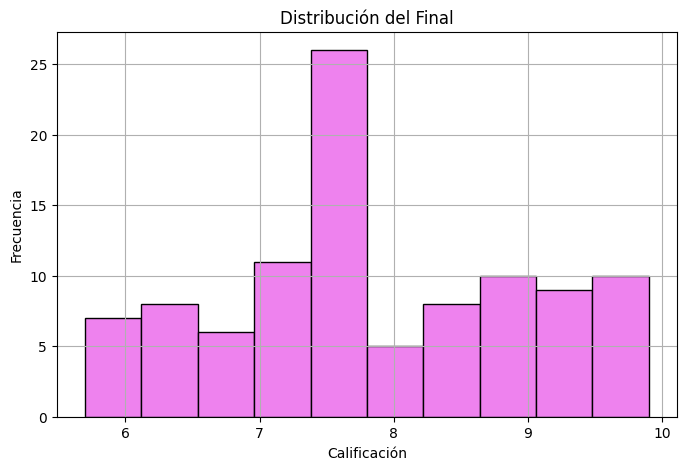

In [49]:
# Histograma - Distribución de calificaciones del Final

plt.figure(figsize=(8, 5))
plt.hist(df["Final"], bins=10, color="violet", edgecolor="black")
plt.title("Distribución del Final")
plt.xlabel("Calificación")	
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

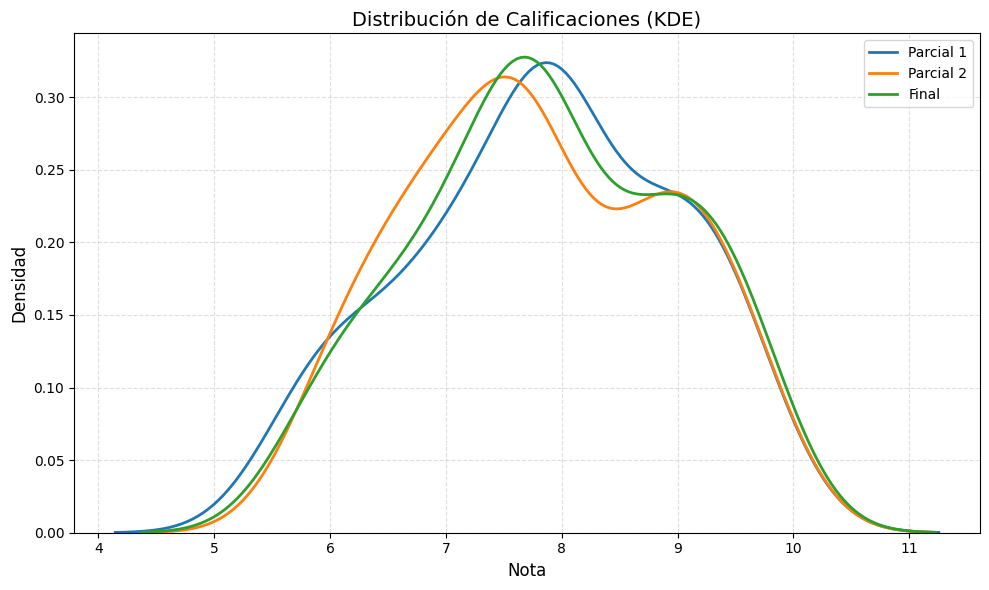

In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Parcial 1"].dropna(), label="Parcial 1", linewidth=2)
sns.kdeplot(df["Parcial 2"].dropna(), label="Parcial 2", linewidth=2)
sns.kdeplot(df["Final"].dropna(), label="Final", linewidth=2)

plt.title("Distribución de Calificaciones (KDE)", fontsize=14)
plt.xlabel("Nota", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

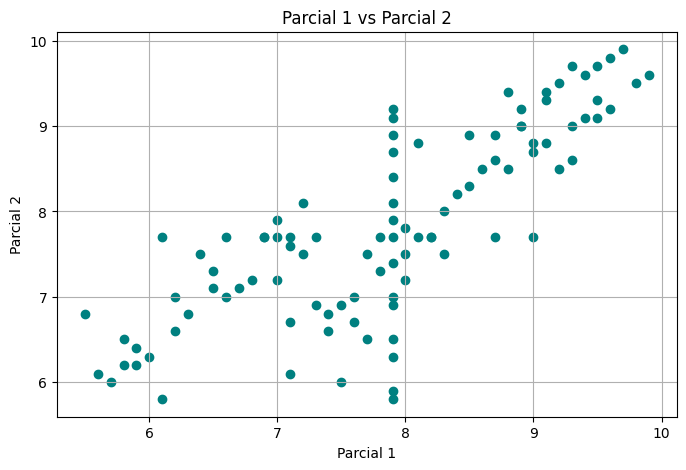

In [38]:
# Diagrama de dispersión entre Parcial 1 y Parcial 2

plt.figure(figsize=(8, 5))
plt.scatter(df["Parcial 1"], df["Parcial 2"], color="teal")
plt.title("Parcial 1 vs Parcial 2")
plt.xlabel("Parcial 1")
plt.ylabel("Parcial 2")
plt.grid(True)
plt.show()

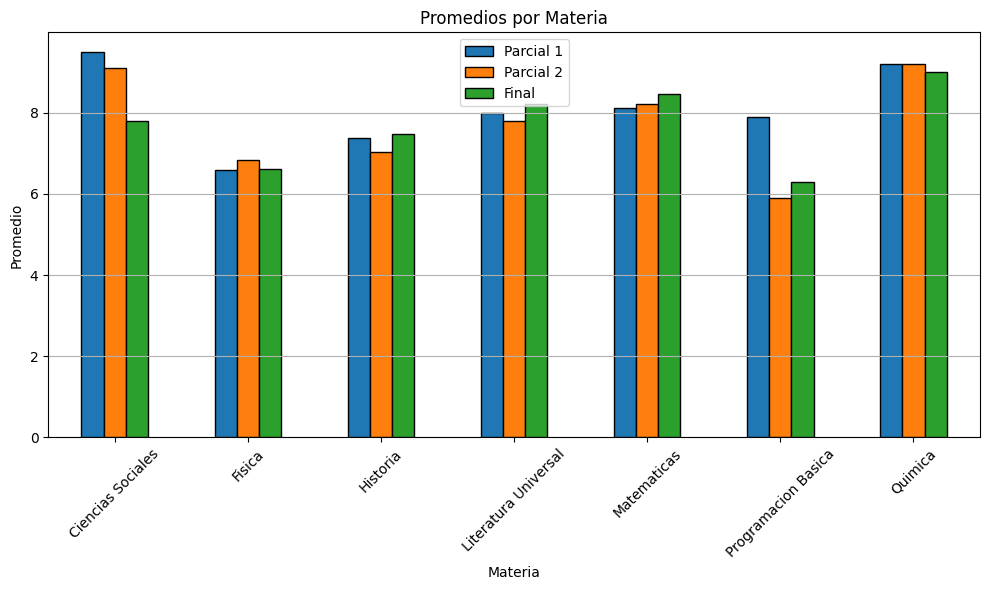

In [ ]:
# Gráfico de barras - Promedios por Materia
promedios = df.groupby("Materia")[["Parcial 1", "Parcial 2", "Final"]].mean()
promedios.plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.title("Promedios por Materia")
plt.ylabel("Promedio")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


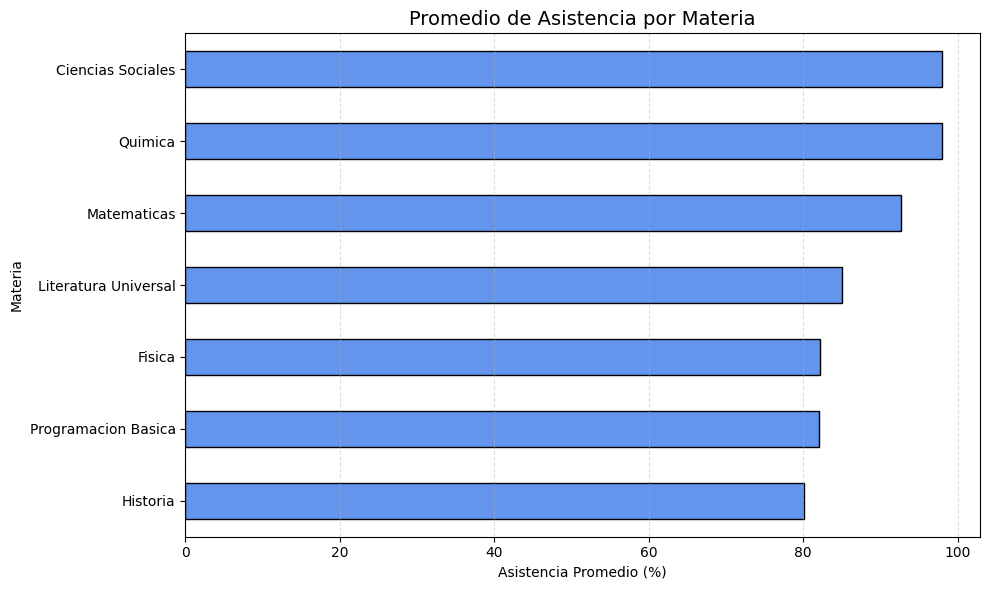

In [52]:
asist_prom = df.groupby("Materia")["Asistencia"].mean().sort_values()

plt.figure(figsize=(10, 6))
asist_prom.plot(kind="barh", color="cornflowerblue", edgecolor="black")
plt.title("Promedio de Asistencia por Materia", fontsize=14)
plt.xlabel("Asistencia Promedio (%)")
plt.ylabel("Materia")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


# 6. Exportación a Archivo SQLite

- Guardar el dataframe en la base de datos
- Realizar una consulta SQL para verificar
- Mostrar el resultado

In [55]:
conn = sqlite3.connect("calificaciones.sqlite")
df.to_sql("estudiantes", conn, if_exists="replace", index=False)
conn.close()

In [56]:
conn = sqlite3.connect("calificaciones.sqlite")
df_sql = pd.read_sql_query("SELECT * FROM estudiantes", conn)
conn.close()



In [57]:
df_sql.head(10)

,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,7.8,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92
5,Javier Soto,Fisica,5.8,6.5,6.0,80
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,7.8,98
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85
8,Valentina Ruiz,Matematicas,7.0,7.7,7.8,90
9,Diego Castro,Fisica,6.8,7.2,7.5,93


In [58]:
# consultar el promedio final por materia

conn = sqlite3.connect("calificaciones.sqlite")
query = "SELECT Materia, AVG(Final) AS PromedioFinal FROM estudiantes GROUP BY Materia"
promedios = pd.read_sql_query(query, conn)
conn.close()

print(promedios)

                Materia  PromedioFinal
0     Ciencias Sociales       7.800000
1                Fisica       6.620833
2              Historia       7.466667
3  Literatura Universal       8.200000
4           Matematicas       8.456000
5   Programacion Basica       6.300000
6               Quimica       9.008333
